In [1]:
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ev.optimization.run_cases import load_case_results, get_best_case
from ev.utils import save_figs

/opt/anaconda3/envs/hopp/lib/python3.8/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)


/Users/cirmas/workspace/HOPP/ev/notebooks/log/hybrid_systems_2024-01-23T19.14.29.126904.log


In [2]:
sns.set_theme()

In [3]:
figs = {}
SAVE_FIGS = True

In [4]:
cases = load_case_results("sweep_battery_2")

cases

[{'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 2700.0,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 473.7261722820382},
   'wind': {'turbine_rating_kw': 448.2948150848136},
   'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 2700.0}},
  'lcoe_real': 0.0845463304314544,
  'avg_missed_peak_load': 15.593515614253938},
 {'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 1200.0,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 575.4725929339215},
   'wind': {'turbine_rating_kw': 1442.5678341307384},
   'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 1200.0}},
  'lcoe_real': 0.11252680307178195,
  'avg_missed_peak_load': 29.970230748656483},
 {'case': {'battery_capacity_kw': 600,
   'battery_capacity_kwh': 600.0,
   'threshold_kw': 500,
   'missed_allowed': 30},
  'technologies': {'pv': {'system_capacity_kw': 1091.1897116384105},
  

In [5]:
cases_pv_only = load_case_results("sweep_battery_2_pv_only")

In [6]:
np.arange(1, 3.25, .25)

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

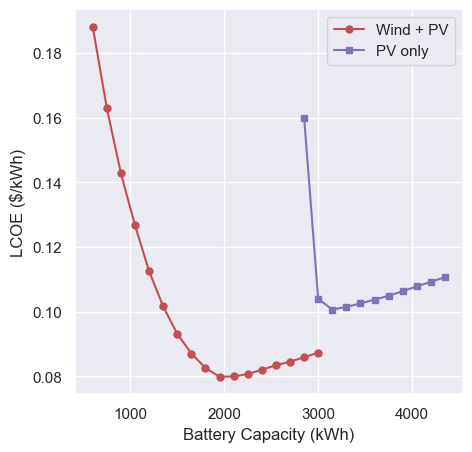

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

x = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases])

y_lcoe = np.array([i["lcoe_real"] for i in cases])

x_pv = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases_pv_only])

y_lcoe_pv = np.array([i["lcoe_real"] for i in cases_pv_only])

xs = np.argsort(x)
ax.plot(x[xs], y_lcoe[xs], color="C3", marker="o", markersize=5, label="Wind + PV")

xs_pv = np.argsort(x_pv)
ax.plot(x_pv[xs_pv][1:], y_lcoe_pv[xs_pv][1:], color="C4", marker="s", markersize=5, label="PV only")

ax.legend()
ax.set_xlabel("Battery Capacity (kWh)")

ax.set_ylabel("LCOE ($/kWh)")

figs["sweep_lcoe"] = fig

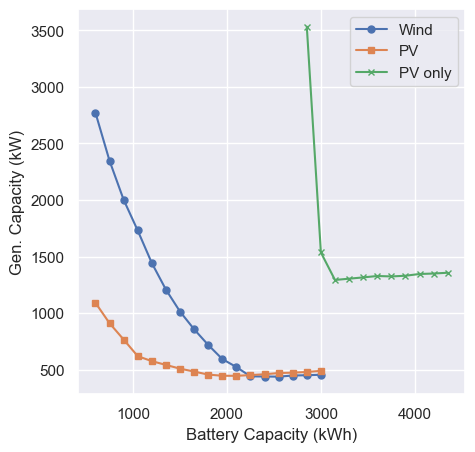

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

x = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases])


x_pv = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases_pv_only])


xs = np.argsort(x)
xs_pv = np.argsort(x_pv)

y_wind = np.array([i["technologies"]["wind"]["turbine_rating_kw"] for i in cases])

ax.plot(x[xs], y_wind[xs], label="Wind", marker="o", markersize=5)

y_pv = np.array([i["technologies"]["pv"]["system_capacity_kw"] for i in cases])
y_pv2 = np.array([i["technologies"]["pv"]["system_capacity_kw"] for i in cases_pv_only])

ax.plot(x[xs], y_pv[xs], label="PV", marker="s", markersize=5)
ax.plot(x_pv[xs_pv][1:], y_pv2[xs_pv][1:], label="PV only", marker="x", markersize=5)

ax.set_xlabel("Battery Capacity (kWh)")
ax.set_ylabel("Gen. Capacity (kW)")
ax.legend()

figs["sweep_gen"] = fig

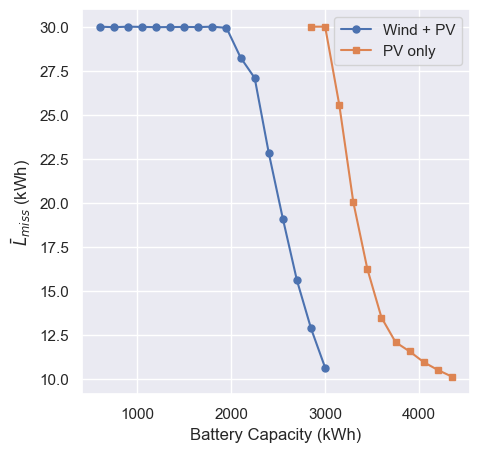

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

x = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases])
y_miss = np.array([i["avg_missed_peak_load"] for i in cases])

x_pv = np.array([i["technologies"]["battery"]["system_capacity_kwh"] for i in cases_pv_only])
y_miss_pv = np.array([i["avg_missed_peak_load"] for i in cases_pv_only])

# ax.set_title("Average missed peak load")
ax.set_xlabel("Battery Capacity (kWh)")
ax.set_ylabel(r"$\bar{L}_{miss}$ (kWh)")

ax.plot(x[xs], y_miss[xs], marker="o", markersize=5, label="Wind + PV")
ax.plot(x_pv[xs_pv][1:], y_miss_pv[xs_pv][1:], marker="s", markersize=5, label="PV only")

ax.legend()

figs["avg_missed_peak"] = fig

In [10]:
get_best_case("sweep_battery_2")

{'case': {'battery_capacity_kw': 600,
  'battery_capacity_kwh': 1950.0,
  'threshold_kw': 500,
  'missed_allowed': 30},
 'technologies': {'pv': {'system_capacity_kw': 446.1646675301198},
  'wind': {'turbine_rating_kw': 594.2172364021573},
  'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 1950.0}},
 'lcoe_real': 0.07988288098634236,
 'avg_missed_peak_load': 29.931143963364093}

In [11]:
get_best_case("sweep_battery_2_pv_only")

{'case': {'battery_capacity_kw': 600,
  'battery_capacity_kwh': 3150.0,
  'threshold_kw': 500,
  'missed_allowed': 30},
 'technologies': {'pv': {'system_capacity_kw': 1292.8621239172476},
  'battery': {'system_capacity_kw': 600, 'system_capacity_kwh': 3150.0}},
 'lcoe_real': 0.10065431147741442,
 'avg_missed_peak_load': 25.58002640630186}

In [12]:
if SAVE_FIGS:
    save_figs(figs)